## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0715 21:40:34.003172  3220 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0715 21:40:34.028173  3220 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 21:40:34.713605  3220 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 21:40:34.713605  3220 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0715 21:40:34.995216  3220 deprecation.py:323] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.0596 - acc: 0.2325 - val_loss: 1.9850 - val_acc: 0.2664
Epoch 2/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9712 - acc: 0.2651 - val_loss: 1.9947 - val_acc: 0.2799
Epoch 3/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.9456 - acc: 0.2805 - val_loss: 1.9900 - val_acc: 0.2368
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9516 - acc: 0.2644 - val_loss: 1.9321 - val_acc: 0.2647
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8934 - acc: 0.2920 - val_loss: 1.8652 - val_acc: 0.2968
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9005 - acc: 0.2922 - val_loss: 1.9082 - val_acc: 0.2946
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.9167 - acc: 0.2850 - val_loss: 1.8978 -

Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6918 - acc: 0.3959 - val_loss: 1.6489 - val_acc: 0.4081
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5977 - acc: 0.4314 - val_loss: 1.5731 - val_acc: 0.4401
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5422 - acc: 0.4483 - val_loss: 1.5018 - val_acc: 0.4729
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4887 - acc: 0.4685 - val_loss: 1.5499 - val_acc: 0.4465
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4624 - acc: 0.4770 - val_loss: 1.4712 - val_acc: 0.4765
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4201 - acc: 0.4947 - val_loss: 1.4742 - val_acc: 0.4672
Epoch 8/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.4030 - acc: 0.5006 - val_loss: 1.4368 - val_acc: 0.4824
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 109us/step - loss: 1.7420 - acc: 0.3906 - val_loss: 1.7063 - val_acc: 0.4069
Epoch 4/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6791 - acc: 0.4105 - val_loss: 1.6667 - val_acc: 0.4176
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6347 - acc: 0.4260 - val_loss: 1.6408 - val_acc: 0.4195
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5934 - acc: 0.4388 - val_loss: 1.5978 - val_acc: 0.4293
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5592 - acc: 0.4512 - val_loss: 1.5633 - val_acc: 0.4480
Epoch 8/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5295 - acc: 0.4601 - val_loss: 1.5497 - val_acc: 0.4507
Epoch 9/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5075 - acc: 0.4705 - val_loss: 1.5090 - val_acc: 0.4663
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 109us/step - loss: 1.9885 - acc: 0.3047 - val_loss: 1.9614 - val_acc: 0.3191
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.9447 - acc: 0.3221 - val_loss: 1.9221 - val_acc: 0.3262
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9100 - acc: 0.3353 - val_loss: 1.8918 - val_acc: 0.3411
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8826 - acc: 0.3424 - val_loss: 1.8686 - val_acc: 0.3518
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8611 - acc: 0.3509 - val_loss: 1.8499 - val_acc: 0.3554
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8425 - acc: 0.3576 - val_loss: 1.8326 - val_acc: 0.3647
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8266 - acc: 0.3625 - val_loss: 1.8196 - val_acc: 0.3688 - ac
Epoch 11/50
50000/50000 [==============

50000/50000 [==============================] - 5s 109us/step - loss: 2.2185 - acc: 0.2022 - val_loss: 2.2100 - val_acc: 0.2114
Epoch 6/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.2045 - acc: 0.2114 - val_loss: 2.1962 - val_acc: 0.2250
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.1913 - acc: 0.2201 - val_loss: 2.1834 - val_acc: 0.2339
Epoch 8/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.1788 - acc: 0.2270 - val_loss: 2.1713 - val_acc: 0.2392
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.1670 - acc: 0.2347 - val_loss: 2.1597 - val_acc: 0.2440
Epoch 10/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.1556 - acc: 0.2411 - val_loss: 2.1485 - val_acc: 0.2474
Epoch 11/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.1446 - acc: 0.2452 - val_loss: 2.1375 - val_acc: 0.2536
Epoch 12/50
50000/50000 [==================

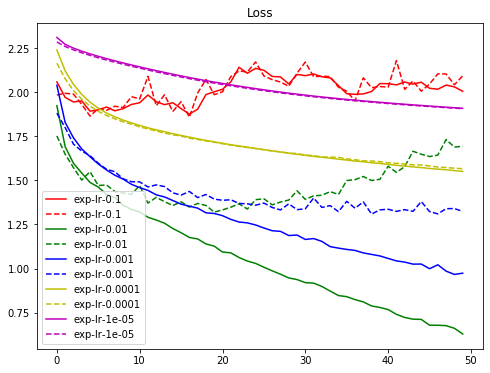

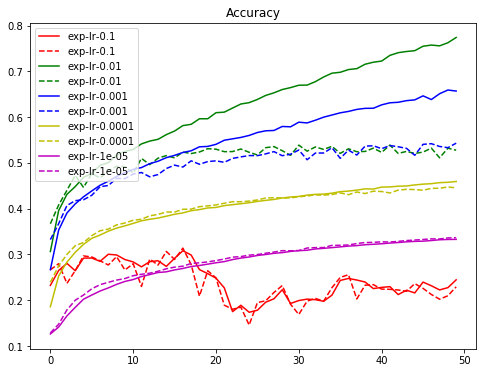

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

 # 以上 momentum =0.95 及使用 nesterov = False

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.55

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.9796 - acc: 0.2938 - val_loss: 1.8791 - val_acc: 0.3388
Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.7930 - acc: 0.3688 - val_loss: 1.7332 - val_acc: 0.3875
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7147 - acc: 0.3956 - val_loss: 1.8070 - val_acc: 0.3515
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6613 - acc: 0.4141 - val_loss: 1.7799 - val_acc: 0.3578
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6209 - acc: 0.4299 - val_loss: 1.6344 - val_acc: 0.4219
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5857 - acc: 0.4411 - val_loss: 1.6910 - val_acc: 0.4006
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5544 - acc: 0.4536 - val_loss: 1.5821 - 

Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.0890 - acc: 0.2761 - val_loss: 2.0404 - val_acc: 0.3018
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.0065 - acc: 0.3065 - val_loss: 1.9726 - val_acc: 0.3184
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9498 - acc: 0.3262 - val_loss: 1.9284 - val_acc: 0.3346
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9091 - acc: 0.3394 - val_loss: 1.8925 - val_acc: 0.3428
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8785 - acc: 0.3475 - val_loss: 1.8656 - val_acc: 0.3523
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8540 - acc: 0.3556 - val_loss: 1.8444 - val_acc: 0.3595
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8344 - acc: 0.3624 - val_loss: 1.8266 - val_acc: 0.3640
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 109us/step - loss: 2.2302 - acc: 0.1981 - val_loss: 2.2169 - val_acc: 0.2061
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.2061 - acc: 0.2155 - val_loss: 2.1938 - val_acc: 0.2198
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.1843 - acc: 0.2262 - val_loss: 2.1732 - val_acc: 0.2337
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1650 - acc: 0.2338 - val_loss: 2.1550 - val_acc: 0.2393
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.1477 - acc: 0.2413 - val_loss: 2.1387 - val_acc: 0.2491
Epoch 8/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.1320 - acc: 0.2486 - val_loss: 2.1239 - val_acc: 0.2557
Epoch 9/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.1177 - acc: 0.2542 - val_loss: 2.1103 - val_acc: 0.2622
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 109us/step - loss: 2.3099 - acc: 0.1269 - val_loss: 2.3077 - val_acc: 0.1259
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3051 - acc: 0.1304 - val_loss: 2.3032 - val_acc: 0.1292
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.3008 - acc: 0.1345 - val_loss: 2.2992 - val_acc: 0.1321
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.2969 - acc: 0.1383 - val_loss: 2.2954 - val_acc: 0.1349
Epoch 8/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.2932 - acc: 0.1420 - val_loss: 2.2920 - val_acc: 0.1379
Epoch 9/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.2899 - acc: 0.1462 - val_loss: 2.2887 - val_acc: 0.1400
Epoch 10/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.2867 - acc: 0.1501 - val_loss: 2.2857 - val_acc: 0.1436
Epoch 11/50
50000/50000 [===================

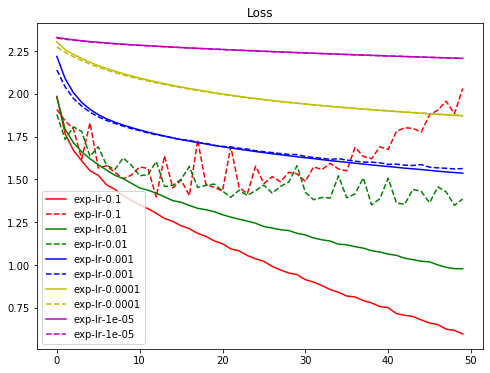

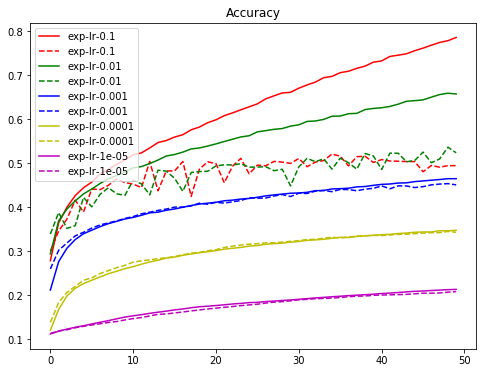

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

 # 以上 momentum =0.55 及使用 nesterov = False

In [12]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.55

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9933 - acc: 0.2839 - val_loss: 1.8621 - val_acc: 0.3457
Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8075 - acc: 0.3591 - val_loss: 1.7782 - val_acc: 0.3654
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7307 - acc: 0.3875 - val_loss: 1.8024 - val_acc: 0.3322
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6720 - acc: 0.4067 - val_loss: 1.6433 - val_acc: 0.4201
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6317 - acc: 0.4236 - val_loss: 1.6346 - val_acc: 0.4190
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5955 - acc: 0.4360 - val_loss: 1.6207 - val_acc: 0.4167
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5644 - acc: 0.4479 - val_loss: 1.6451 - 

Epoch 2/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1371 - acc: 0.2525 - val_loss: 2.0906 - val_acc: 0.2774
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.0596 - acc: 0.2810 - val_loss: 2.0246 - val_acc: 0.2990
Epoch 4/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.0037 - acc: 0.3021 - val_loss: 1.9794 - val_acc: 0.3089
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.9612 - acc: 0.3166 - val_loss: 1.9417 - val_acc: 0.3234
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9271 - acc: 0.3265 - val_loss: 1.9110 - val_acc: 0.3322
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8988 - acc: 0.3376 - val_loss: 1.8873 - val_acc: 0.3429
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8755 - acc: 0.3459 - val_loss: 1.8671 - val_acc: 0.3391
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 125us/step - loss: 2.2653 - acc: 0.1703 - val_loss: 2.2535 - val_acc: 0.1817
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2461 - acc: 0.1909 - val_loss: 2.2356 - val_acc: 0.2005
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2290 - acc: 0.2055 - val_loss: 2.2195 - val_acc: 0.2170
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.2133 - acc: 0.2197 - val_loss: 2.2043 - val_acc: 0.2310
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1984 - acc: 0.2320 - val_loss: 2.1898 - val_acc: 0.2364
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1841 - acc: 0.2403 - val_loss: 2.1760 - val_acc: 0.2477
Epoch 9/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.1704 - acc: 0.2479 - val_loss: 2.1627 - val_acc: 0.2591
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 135us/step - loss: 2.3239 - acc: 0.1080 - val_loss: 2.3176 - val_acc: 0.1105
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.3182 - acc: 0.1105 - val_loss: 2.3123 - val_acc: 0.1131
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.3131 - acc: 0.1127 - val_loss: 2.3075 - val_acc: 0.1157
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3085 - acc: 0.1152 - val_loss: 2.3032 - val_acc: 0.1192
Epoch 8/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.3043 - acc: 0.1184 - val_loss: 2.2992 - val_acc: 0.1236
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.3004 - acc: 0.1217 - val_loss: 2.2955 - val_acc: 0.1274
Epoch 10/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2968 - acc: 0.1250 - val_loss: 2.2920 - val_acc: 0.1323
Epoch 11/50
50000/50000 [===================

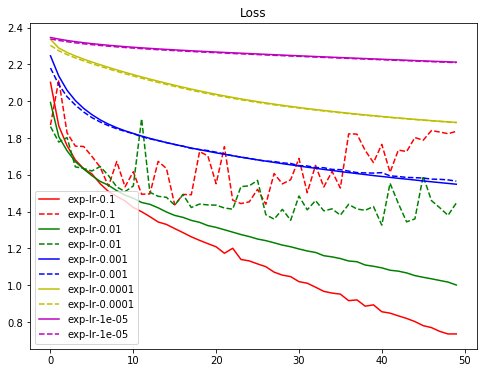

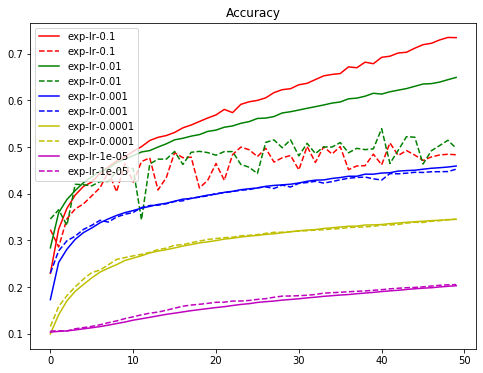

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 以上 momentum =0.55 及使用 nesterov = True